In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from munch import Munch
from scipy.linalg import eigvalsh

from QO.general import vec2
from QO.hamiltonians import k_space_H, eigs_over_k

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Ok now define the full hamiltonian with magnetic field


With the magentic unit cell size L = 200 sites the magnetic field is very small
so the DOS looks similar to the zero field case



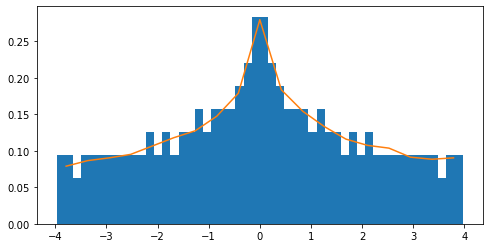

In [24]:
print(
"""
Ok now define the full hamiltonian with magnetic field
""")

import pickle
lattice_E, lattice_DOS = pickle.load(open( "dispersions.pickle", "rb"))

params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
L = vec2(200,1),

#the k_x and y in real space at which to evaluate the hamiltionian
k = vec2(0,0),

#the number of unit cells to tile in each direction
N = vec2(20, 20),
)  

print("""
With the magentic unit cell size L = 200 sites the magnetic field is very small
so the DOS looks similar to the zero field case
""")
eigs = eigs_over_k(k_space_H, **params)
plt.hist(eigs, bins = 50, density = 1)
plt.plot((lattice_E[1:] + lattice_E[:-1])/2, lattice_DOS)
# %%


Ok moving on to the internal energy, which is the sum of the states below the chemical potential


Plotting the fermi dirac distribution at differnt temperatures.



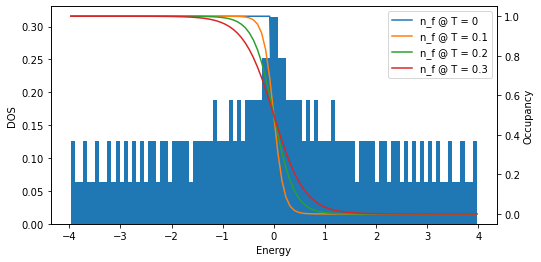

In [25]:
from scipy.linalg import eigvalsh

from QO.thermodynamics import fermi_dirac

print("""
Ok moving on to the internal energy, which is the sum of the states below the chemical potential
""")

mu = 0

print("""
Plotting the fermi dirac distribution at differnt temperatures.
""")
f, ax = plt.subplots()
_, bins, _ = ax.hist(eigs, bins = 100, density = 1)

ax2 = ax.twinx()
for T in [0, 0.1, 0.2, 0.3]:
    ax2.plot(bins, fermi_dirac(bins, mu, T = T), label = f"n_f @ T = {T}")

ax2.set(ylabel = "Occupancy")
ax.set(xlabel = "Energy", ylabel = "DOS")
ax2.legend()

# %%


Plotting the contributions to the grand canonical potential for each energy at T = 0.3



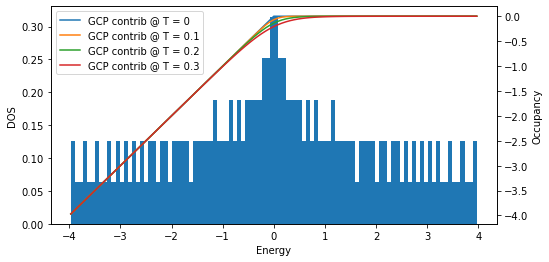

In [26]:
from QO.thermodynamics import GCP_contributions, GCP

print(f"""
Plotting the contributions to the grand canonical potential for each energy at T = {T}
""")
f, ax = plt.subplots()
_, bins, _ = ax.hist(eigs, bins = 100, density = 1)

ax2 = ax.twinx()
for T in [0, 0.1, 0.2, 0.3]:
    ax2.plot(bins, GCP_contributions(bins, mu, T = T), label = f"GCP contrib @ T = {T}")

ax2.set(ylabel = "Occupancy")
ax.set(xlabel = "Energy", ylabel = "DOS")
ax2.legend()
# %%


Plotting the GCP as a function of T to check it's smooth and looks approximately correct



[Text(0, 0.5, 'GCP'), Text(0.5, 0, 'T'), Text(0.5, 1.0, 'GCP against T')]

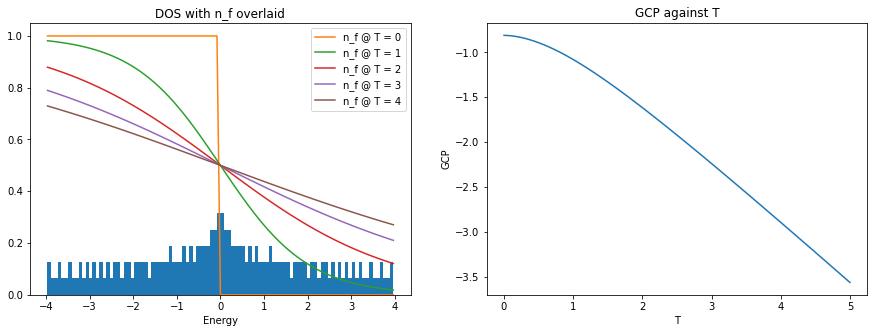

In [27]:
print(f"""
Plotting the GCP as a function of T to check it's smooth and looks approximately correct
""")

f, axes = plt.subplots(ncols = 2, figsize = (15,5))

_, bins, _ = axes[0].hist(eigs, bins = 100, density = 1)

for T in range(0,5):
    axes[0].plot(bins, fermi_dirac(bins, mu, T = T), label = f"n_f @ T = {T}")
axes[0].set(xlabel = "Energy", title= "DOS with n_f overlaid")
axes[0].legend()

T = np.linspace(0, 5, 100)[:, None]
axes[1].plot(T, GCP(eigs[None, :], mu, T = T))
axes[1].set(xlabel = "T", ylabel = "GCP", title = "GCP against T")


Plotting the GCP as a function of \mu 



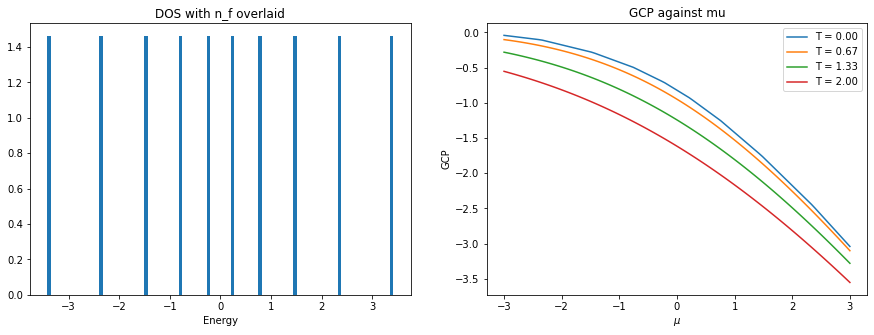

In [35]:
print(f"""
Plotting the GCP as a function of \mu 
""")

f, axes = plt.subplots(ncols = 2, figsize = (15,5))

_, bins, _ = axes[0].hist(eigs, bins = 100, density = 1)

# for mu in range(0,5):
#     axes[0].plot(bins, fermi_dirac(bins, mu, T = T), label = f"n_f @ T = {T}")
axes[0].set(xlabel = "Energy", title= "DOS with n_f overlaid")

mu = np.linspace(-3, 3, 100)[:, None]
for T in np.linspace(0,2,4):
    axes[1].plot(mu, GCP(eigs[None, :], mu, T = T), label  = f"T = {T:.2f}")
axes[1].set(xlabel = "$\mu$", ylabel = "GCP", title = "GCP against mu")
axes[1].legend()

In [31]:
print(f"""
Plotting the GCP as a function of \mu for low magnetic field
""")

def plot_DOS_and_GCP_against_mu(eigs):
    f, axes = plt.subplots(ncols = 4, figsize = (20,5))
    e_density, bins, _ = axes[0].hist(eigs, bins = 100, density = 1)

    # for mu in range(0,5):
    #     axes[0].plot(bins, fermi_dirac(bins, mu, T = T), label = f"n_f @ T = {T}")
    axes[0].set(xlabel = "Energy", title= "DOS")
    
    
    axes[1].set(title = "GCP contributions at T = 0")
    for mu in [-3,0,3]:
        T = 0
        contrib = e_density * GCP_contributions(bins, mu = mu, T = T)[:-1]
        axes[1].plot(bins[:-1], contrib, label = f"mu = {mu}, T = {T}")
    axes[1].legend()

    mu = np.linspace(-4, 0, 100)[:, None]
    for T in np.linspace(0,0.1,3):
        axes[2].plot(mu, GCP(eigs[None, :], mu, T = T), label  = f"T = {T:.2f}")
    axes[2].set(xlabel = "$\mu$", ylabel = "GCP", title = "GCP against mu")
    axes[2].legend()

    mu = np.linspace(-4, 0, 100)[:, None]
    for T in np.linspace(0,0.1,3):
        axes[3].plot(mu[:-1,], -np.diff(GCP(eigs[None, :], mu, T = T)), label  = f"T = {T:.2f}")
    axes[3].set(xlabel = "$\mu$", ylabel = "GCP", title = "N = - dGCP / d\mu against mu")
    axes[3].legend()

plot_DOS_and_GCP_against_mu(eigs)


Computing eigs for a higher magnetic field
L = vec2(x=20, y=1), N = vec2(x=20, y=20)


Plotting the GCP as a function of \mu for higher magnetic field
L = vec2(x=20, y=1), N = vec2(x=20, y=20)



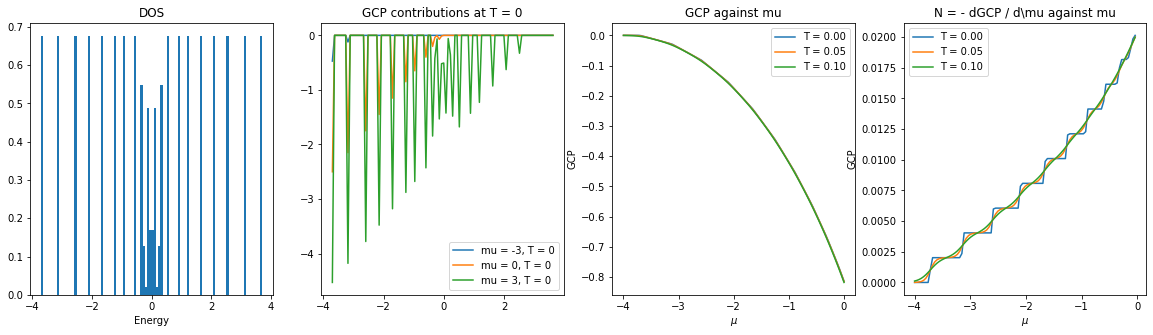

In [32]:
params = Munch(
t = vec2(1,1),
L = vec2(20,1),
k = vec2(0,0),
N = vec2(20, 20),
)  

print(f"""
Computing eigs for a higher magnetic field
L = {params.L}, N = {params.N}
""")

eigs_high_B = eigs_over_k(k_space_H, **params)

print(f"""
Plotting the GCP as a function of \mu for higher magnetic field
L = {params.L}, N = {params.N}
""")
plot_DOS_and_GCP_against_mu(eigs_high_B)


Computing eigs for a higher magnetic field
L = vec2(x=10, y=1), N = vec2(x=20, y=20)


Plotting the GCP as a function of \mu for higher magnetic field
L = vec2(x=10, y=1), N = vec2(x=20, y=20)



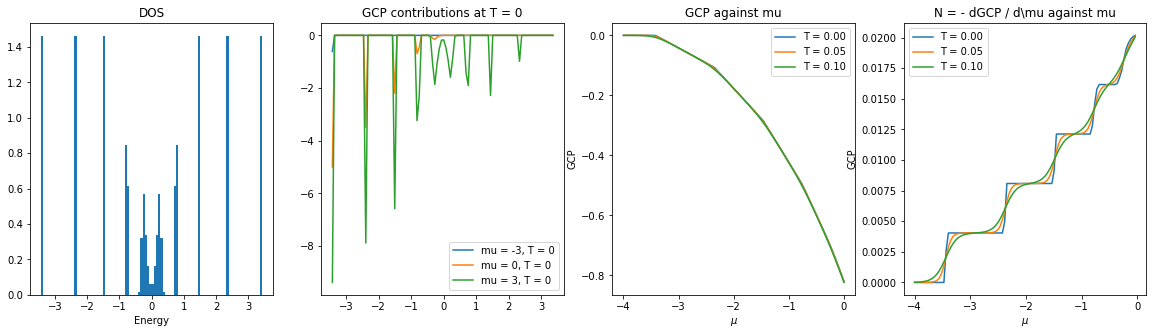

In [33]:
params = Munch(
t = vec2(1,1),
L = vec2(10,1),
k = vec2(0,0),
N = vec2(20, 20),
)  

print(f"""
Computing eigs for a higher magnetic field
L = {params.L}, N = {params.N}
""")

eigs_higher_B = eigs_over_k(k_space_H, **params)

print(f"""
Plotting the GCP as a function of \mu for higher magnetic field
L = {params.L}, N = {params.N}
""")

plot_DOS_and_GCP_against_mu(eigs_higher_B)